### Driving Through Data: Analyzing the 2023 Formula 1 Season

The 2023 season marked the 74th edition of the FIA Formula 1 World Championship, reaffirming its status as the pinnacle of motorsport. This was the second year under the technical regulations introduced in 2022, designed to promote closer and more exciting competition on the track. The season was filled with record-breaking moments and unforgettable highlights, showcasing the evolving dynamics of the sport.

This analysis aims to delve into the key aspects that defined the season, combining critical statistics, detailed visualizations, and insights into the performance of drivers and teams. Each graph and table has been carefully crafted to provide a clear and comprehensive view of the championship, shedding light on essential data and identifying significant trends.

Beyond presenting the facts, this project seeks to demonstrate the potential of data analysis in sports. Using tools like Python and advanced visualization techniques, it reveals how data can enhance our understanding of motorsport at a deeper level.

Get ready to dive into the captivating world of Formula 1 and uncover what made the 2023 season a remarkable chapter in its illustrious history!

#### To begin the analysis, we start by importing the essential libraries and loading the datasets. Next, we assign unique colors to the drivers and teams for better visualization and apply some initial data preprocessing steps to ensure consistency and clarity throughout the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, HTML
import numpy as np
import re

In [2]:
os.chdir('C:/Users/Usuario/Documents/Franco/Analisis de datos/Portafolio/Proyectos/Proyecto F1 23')

calendar = pd.read_csv('F1_2023season_calendar.csv')
driver_of_the_day = pd.read_csv('F1_2023season_driverOfTheDayVotes.csv')
drivers = pd.read_csv('F1_2023season_drivers.csv')
qualifying_results = pd.read_csv('F1_2023season_qualifyingResults.csv')
race_results = pd.read_csv('F1_2023season_raceResults.csv')
sprint_results = pd.read_csv('F1_2023season_sprintResults.csv')
sprint_shootout_results = pd.read_csv('F1_2023season_sprintShootoutResults.csv')
teams = pd.read_csv('F1_2023season_teams.csv')

In [3]:
def assign_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers':  
            if "De Vries" in val:
                abbr = "DEV"
            else:
                abbr = val.split()[1].upper()[0:3]  
        elif val_type == 'teams':  
            abbr = val[0:4].upper()  
        
        if abbr in ['ALFA', 'BOT', 'ZHO']:  
            cl.append('#900000')  
        elif abbr in ['HAAS','MAG', 'HUL']:  
            cl.append('#ffffff')  
        elif abbr in ['ASTO','ALO', 'STR']:  
            cl.append('#006f62')  
        elif abbr in ['WILL','ALB', 'SAR']:  
            cl.append('#0072ff')  
        elif abbr in ['ALPH','TSU', 'LAW', 'DEV', 'RIC']:  
            cl.append('#2b5962')  
        elif abbr in ['MCLA','NOR', 'PIA']:  
            cl.append('#ff8700')  
        elif abbr in ['RED ','VER', 'PER']:  
            cl.append('#0600f0')  
        elif abbr in ['FERR','LEC', 'SAI']:  
            cl.append('#cb0000')  
        elif abbr in ['MERC','HAM', 'RUS']:  
            cl.append('#00d2bd')  
        elif abbr in ['ALPI','OCO', 'GAS']:  
            cl.append('#0090ff')  
        else:
            cl.append('#d3d3d3')  

    return cl

In [4]:

race_results['Team'] = race_results['Team'].replace({'Aston Martib Aramco Mercedes': 'Aston Martin Aramco Mercedes'})
sprint_results['Team'] = sprint_results['Team'].replace({'Aston Martib Aramco Mercedes': 'Aston Martin Aramco Mercedes'})

In [5]:

calendar.index = range(1, len(calendar) + 1)
teams.index = range(1, len(teams) + 1)
drivers.index = range(1, len(drivers) + 1)

### 2023 Race Calendar

In [6]:

calendar

,Round,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
1,1,05/03/2023,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
2,2,19/03/2023,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,1:30.734,Lewis Hamilton,2021,27,3
3,3,02/04/2023,Rolex Australian GP,Australia,Melbourne,Melbourne Grand Prix Circuit,1996,58,5.278,306.124,1:20.235,Sergio Perez,2023,14,4
4,4,30/04/2023,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit,2016,51,6.003,306.049,1:43.009,Charles Leclerc,2019,20,2
5,5,07/05/2023,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,1:29.708,Max Verstappen,2023,19,3
6,6,NaN,Qatar Airways Gran Premio Del Made In Italy e ...,Italy,Imola,Autodromo Enzo e Dino Ferrari,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,19,1
7,7,28/05/2023,Grand Prix de Monaco,Monaco,Monaco,Circuit de Monaco,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
8,8,04/06/2023,AWS Gran Premio de España,Spain,Catalunya,Circuit de Barcelona-Catalunya,1991,66,4.657,307.236,1:16.330,Max Verstappen,2023,14,2
9,9,18/06/2023,Pirelli Grand Prix du Canada,Canada,Montréal,Circuit Gilles-Villeneuve,1978,70,4.361,305.270,1:13.078,Valtteri Bottas,2018,14,3
10,10,02/07/2023,Rolex Grosser Preis Von Österreich,Austria,Spielberg,Red Bull Ring,1970,71,4.318,306.452,1:05.619,Carlos Sainz,2020,10,3


This table showcases all the races that were part of the 2023 Formula 1 calendar, listing the circuits and scheduled dates for each Grand Prix. The calendar for this year introduced several significant changes compared to the 2022 season:

- Azerbaijan moved its Grand Prix from June to April.
- Las Vegas made a spectacular return to Formula 1 after more than 40 years, hosting its debut Grand Prix on a street circuit along the Las Vegas Strip.
- France dropped off the schedule, continuing its pattern of intermittent appearances.
- Emilia-Romagna canceled its Grand Prix due to severe regional flooding.
- China, initially included in the calendar, faced cancellation because of ongoing COVID-19 restrictions.

The season kicked off with the Bahrain Grand Prix, maintaining the tradition of being one of the opening races since 2006. As has been the case since 2014, the championship concluded with the Abu Dhabi Grand Prix.

### Teams - 2023 Season

In [7]:
teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
1,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christain Horner,Pierre Waché,RB19,Honda RBPT,1997,6,1(x113),95,95
2,Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W14,Mercedes,1970,8,1(x116),129,96
3,Ferrari,Scuderia Ferrari,"Maranello, Italy",Frédéric Vasseur,Enrico Cardile / Enrico Gualtieri,SF-23,Ferrari,1950,16,1(x244),249,259
4,McLaren,McLaren Formula 1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou / Neil Houldey,MCL60,Mercedes,1966,8,1(x183),156,165
5,Aston Martin,Aston Martin Aramco Cognizant F1 Team,"Silverstone, United Kingdom",Mike Krack,Dan Fallows,AMR23,Mercedes,2018,0,1(x1),1,1
6,Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Bruno Famin,Matt Harman,A523,Renault,1986,2,1(x21),20,15
7,Williams,Williams Racing,"Grove, United Kingdom",James Vowles,Pat Fry,FW45,Mercedes,1978,9,1(x114),128,133
8,AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT04,Honda RBPT,1985,0,1(x2),1,3
9,Alfa Romeo,Alfa Romeo F1 Team Stake,"Hinwil, Switzerland",Alessandro Alunni Bravi,James Key,C43,Ferrari,1993,0,1(x1),1,7
10,Haas F1 Team,MoneyGram Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF-23,Ferrari,2016,0,4(x1),1,2


As in recent years, a total of 10 teams competed in the 2023 Formula 1 season.

### Drivers of the 2023 Season

In [8]:
drivers

,Driver,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
1,Max Verstappen,VER,1,Red Bull Racing,Netherlands,98,2586.5,185,3,1(x54),1,30/09/1997,"Hasselt, Belgium"
2,Sergio Perez,PER,11,Red Bull Racing,Mexico,35,1486.0,258,0,1(x6),1,26/01/1990,"Guadalajara, Mexico"
3,Lewis Hamilton,HAM,44,Mercedes,United Kingdom,197,4639.5,332,7,1(x103),1,07/01/1985,"Stevenage, England"
4,Fernando Alonso,ALO,14,Aston Martin,Spain,106,2267.0,380,2,1(x32),1,29/07/1981,"Oviedo, Spain"
5,Charles Leclerc,LEC,16,Ferrari,Monaco,30,1074.0,125,0,1(x5),1,16/10/1997,"Monte Carlo, Monaco"
6,Lando Norris,NOR,4,McLaren,United Kingdom,13,633.0,104,0,2(x7),1,13/11/1999,"Bristol, England"
7,Carlos Sainz,SAI,55,Ferrari,Sapin,18,982.5,185,0,1(x2),1,01/09/1994,"Madrid, Spain"
8,George Russell,RUS,63,Mercedes,United Kingdom,11,469.0,104,0,1(x1),1,15/02/1998,"King's Lynn, England"
9,Oscar Piastri,PIA,81,McLaren,Australia,2,97.0,22,0,2(x1),2,06/04/2001,"Melbourne, Victoria"
10,Lance Stroll,STR,18,Aston Martin,Canada,3,268.0,143,0,3(x3),1,29/10/1998,"Montreal, Canada"


This table lists all the drivers who participated in the 2023 Formula 1 season.

Let's take a look at the changes in the grid:

- Following a standout performance as a substitute driver in the 2022 season, Nyck de Vries joined AlphaTauri for 2023.
- Logan Sargeant made his debut with Williams, becoming the first American driver to compete in F1 since 2015.
- Oscar Piastri joined McLaren as a replacement for Daniel Ricciardo, following a controversial departure from the Alpine driver academy.
- Fernando Alonso switched teams, leaving Alpine to join Aston Martin, marking one of the most notable moves of the season.
- Pierre Gasly moved from AlphaTauri to Alpine, forming a French driver pairing alongside Esteban Ocon.
- Four-time world champion Sebastian Vettel retired from Formula 1 at the end of the 2022 season.
- After two seasons with Haas, Mick Schumacher was replaced by Nico Hülkenberg.
- Nicholas Latifi, who had several seasons with Williams, did not renew his contract.

We can observe that 22 drivers competed in this season of Formula 1, due to the following changes:

- Daniel Ricciardo replaced Nyck de Vries starting from the Hungarian Grand Prix, as de Vries' results were not meeting expectations.
- From the Dutch Grand Prix onwards, New Zealand driver Liam Lawson was called up to replace Ricciardo at Alpha Tauri during his absence due to a injury sustained at the Dutch Grand Prix. Lawson filled in for five races.

### 2023 Drivers' Championship

In [9]:
race_points = race_results.groupby(['Driver', 'Team'], as_index=False)['Points'].sum()
sprint_points = sprint_results.groupby(['Driver', 'Team'], as_index=False)['Points'].sum()
drivers_points = race_points.merge(
    sprint_points, 
    on=['Driver', 'Team'], 
    how='outer', 
    suffixes=('_main', '_sprint')
)
drivers_points['Total Points'] = drivers_points['Points_main'].fillna(0) + drivers_points['Points_sprint'].fillna(0)
drivers_points['Total Points'] = drivers_points['Total Points'].astype(int)
drivers_points = drivers_points.sort_values(by='Total Points', ascending=False).reset_index(drop=True)
drivers_points['Position'] = range(1, len(drivers_points) + 1)
drivers_points = drivers_points[['Position', 'Driver', 'Team', 'Total Points']]
display(drivers_points.style.hide(axis='index'))

Position,Driver,Team,Total Points
1,Max Verstappen,Red Bull Racing Honda RBPT,575
2,Sergio Perez,Red Bull Racing Honda RBPT,285
3,Lewis Hamilton,Mercedes,234
4,Fernando Alonso,Aston Martin Aramco Mercedes,206
5,Charles Leclerc,Ferrari,206
6,Lando Norris,McLaren Mercedes,205
7,Carlos Sainz,Ferrari,200
8,George Russell,Mercedes,175
9,Oscar Piastri,McLaren Mercedes,97
10,Lance Stroll,Aston Martin Aramco Mercedes,74


- As we can see, Max Verstappen secured his third World Championship, finishing with more than double the points of his teammate, Sergio Perez. An absolutely impressive achievement.
- With 575 points, Verstappen broke the record for the most points scored in a single season. He had previously set the record himself with 454 points.
- Excluding the two Red Bull drivers, the battle from third to eighth place was very close, with just a 59-point difference between them.
- Among the drivers in these positions, Lewis Hamilton stood out for beating his teammate George Russell, bouncing back after finishing behind him last season.
- Fernando Alonso had a remarkable role with Aston Martin, finishing fourth in the standings with a significant gap in both positions and points over his teammate Lance Stroll, who ended up tenth.
- There was a lot of parity between Ferrari drivers, with only a 6-point difference separating them, but in the end, Charles Leclerc finished ahead.
- The top 10 spots were filled by drivers from just five teams, highlighting the performance gap between the leading teams and those at the back of the grid.
- The only driver who did not score points was Nyck de Vries.

In [10]:
colors = assign_color('drivers', drivers_points['Driver'])
drivers_points['Color'] = colors
print(drivers_points)



    Position            Driver                          Team  Total Points  \
0          1    Max Verstappen    Red Bull Racing Honda RBPT           575   
1          2      Sergio Perez    Red Bull Racing Honda RBPT           285   
2          3    Lewis Hamilton                      Mercedes           234   
3          4   Fernando Alonso  Aston Martin Aramco Mercedes           206   
4          5   Charles Leclerc                       Ferrari           206   
5          6      Lando Norris              McLaren Mercedes           205   
6          7      Carlos Sainz                       Ferrari           200   
7          8    George Russell                      Mercedes           175   
8          9     Oscar Piastri              McLaren Mercedes            97   
9         10      Lance Stroll  Aston Martin Aramco Mercedes            74   
10        11      Pierre Gasly                Alpine Renault            62   
11        12      Esteban Ocon                Alpine Renault    

### Top 10 Drivers' Championship Standings Evolution

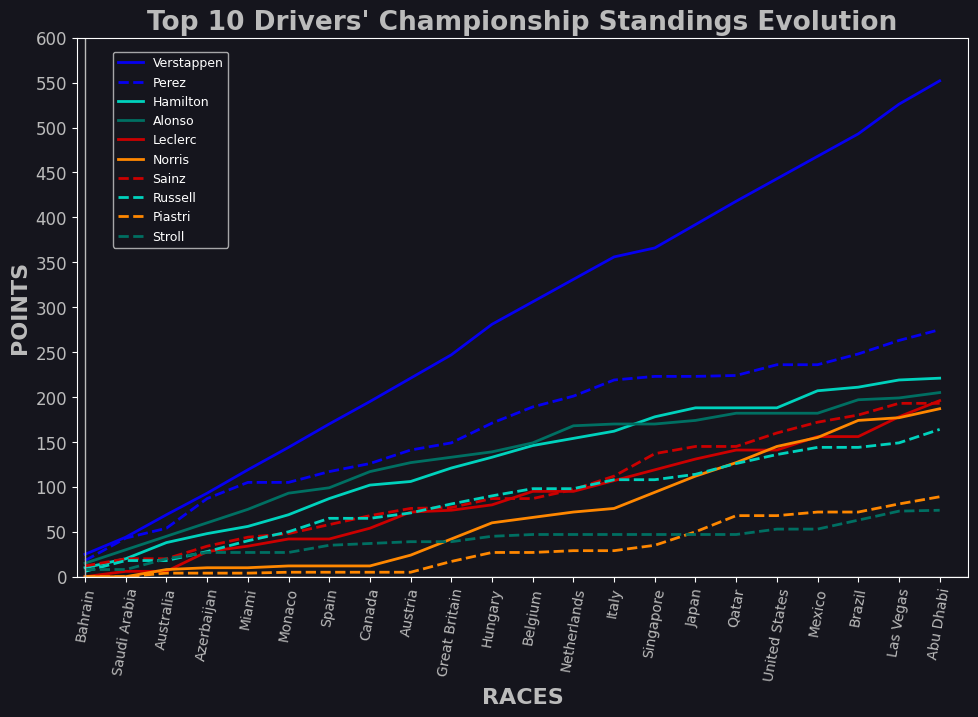

In [11]:
plt.style.use('dark_background')  
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'
plt.rcParams['font.family'] = 'sans-serif'  

driverStandingsTop10 = drivers_points['Driver'][:10].values
driverPointsTop10 = {}
driverPointsTop10Sprint = {}
for driver in driverStandingsTop10:
    driverPointsTop10[driver] = race_results[race_results['Driver'] == driver]['Points'].values
    driverPointsTop10Sprint[driver] = sprint_results[sprint_results['Driver'] == driver]['Points'].values

sp = [3, 10, 20]
for driver in driverStandingsTop10:
    for i in range(len(sp)):
        driverPointsTop10[driver][sp[i]] = driverPointsTop10[driver][sp[i]] + driverPointsTop10Sprint[driver][i]

tracks = race_results['Track'].unique()
tracksSprint = sprint_results['Track'].unique()

plt.figure(figsize=(11.5,7))
plt.axis([-0.2, len(tracks) - 0.3, 0, 600])
c = assign_color('drivers', driverStandingsTop10)

for i in range(10):
    if driverStandingsTop10[i] in ['Sergio Perez', 'Carlos Sainz', 'George Russell', 'Lance Stroll', 'Oscar Piastri']:
        ls = '--'
    else:
        ls = '-'
    plt.plot(driverPointsTop10[driverStandingsTop10[i]].cumsum(), label=driverStandingsTop10[i].split()[1],
             c=c[i], linewidth=2, ls=ls)

plt.title('Top 10 Drivers\' Championship Standings Evolution', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACES', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.ylabel('POINTS', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0, len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(range(0, 610, 50), range(0, 610, 50), fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04, 0.61), fontsize=9)
plt.show()

- We can see that the championship was dominated from start to finish by Max Verstappen, who, although close until the Miami Grand Prix, pulled away significantly from the rest after that. It was an incredible season for him.
- Sergio Perez also held second place comfortably, although not with the same dominance as Max.
- Hamilton and Alonso fought throughout the season for third place, with the Spaniard holding the advantage until Italy. However, starting from Singapore, it was the Brit who claimed that position until the end of the season.
- Lando Norris showed significant progress throughout the season, even fighting with the Ferraris toward the end.
- Piastri finished the season quite far behind his teammate, although he managed to score a lot of points in the last few races.
- Lance Stroll had a difficult mid-season, as he went 7 races without scoring any points.


### 2023 Constructors' Championship

In [12]:
race_team_points = race_results.groupby('Team')['Points'].sum().reset_index()
sprint_team_points = sprint_results.groupby('Team')['Points'].sum().reset_index()
constructor_points = race_team_points.merge(sprint_team_points, on='Team', how='outer', suffixes=('_main', '_sprint'))
constructor_points['Total Points'] = constructor_points['Points_main'].fillna(0) + constructor_points['Points_sprint'].fillna(0)
constructor_points = constructor_points[['Team', 'Total Points']].sort_values(by='Total Points', ascending=False).reset_index(drop=True)
constructor_points['Position'] = range(1, len(constructor_points) + 1)
constructor_points = constructor_points[['Position', 'Team', 'Total Points']]
from IPython.display import display
display(constructor_points.style.hide(axis='index'))

Position,Team,Total Points
1,Red Bull Racing Honda RBPT,860
2,Mercedes,409
3,Ferrari,406
4,McLaren Mercedes,302
5,Aston Martin Aramco Mercedes,280
6,Alpine Renault,120
7,Williams Mercedes,28
8,AlphaTauri Honda RBPT,25
9,Alfa Romeo Ferrari,16
10,Haas Ferrari,12


- As we saw in the Drivers' Championship, Red Bull had no competition this season, finishing with a 451-point advantage over the second-place team. This victory marked their sixth World Championship, and their second consecutive one.
- Mercedes claimed second place in the standings, finishing just 3 points ahead of Ferrari.
- McLaren, on the other hand, triumphed over Aston Martin to secure fourth place in the championship.
- Alpine had no real rivals, as they finished far from both fifth and seventh.
- Williams managed to escape the bottom spot from last season, securing seventh place this year.
- Haas finished last, worsening their eighth-place finish from the previous year.

### Teams' Championship Standings Evolution

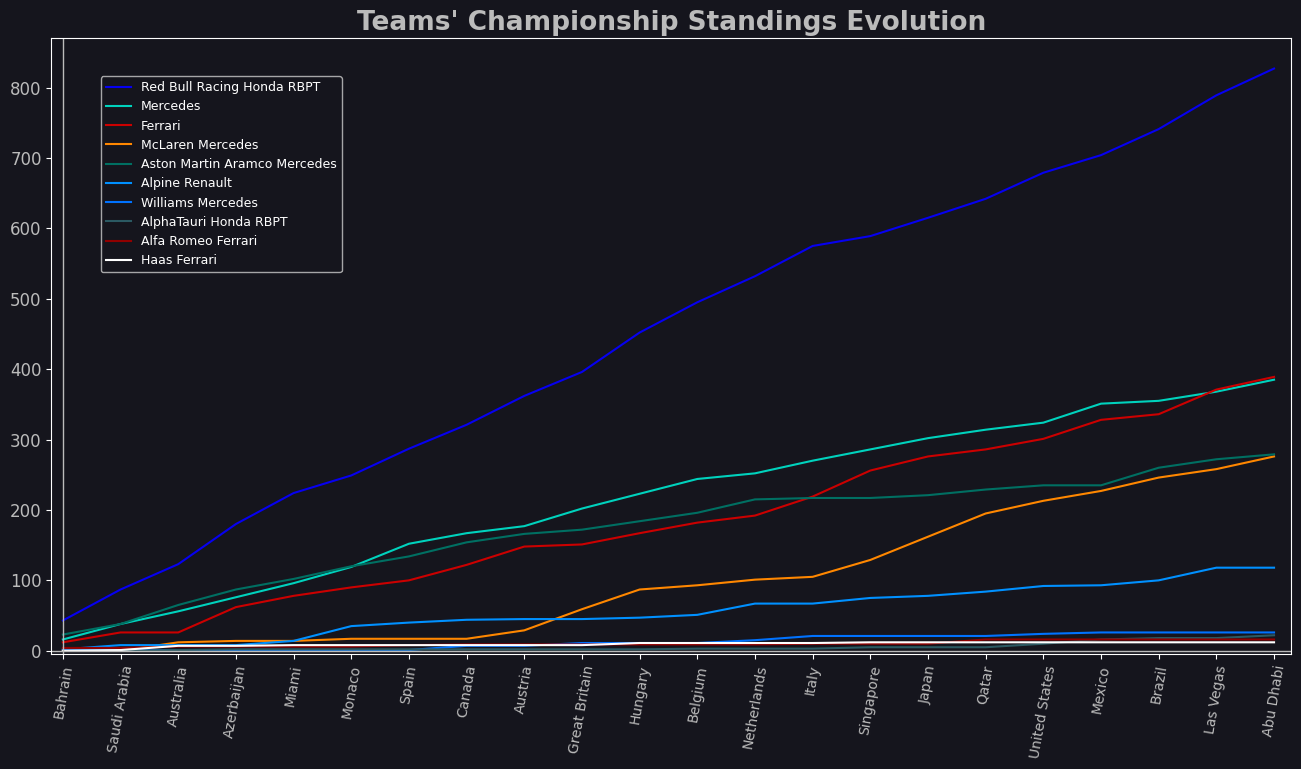

In [13]:
teamNames = constructor_points['Team'].unique()
teamPoints = {};   teamPointsSprint = {}
trackTeamPtsMerged = race_results.groupby(['Track','Team'])['Points'].sum()
trackTeamPtsSprintMerged = sprint_results.groupby(['Track','Team'])['Points'].sum()
for team in teamNames:
    teamPoints[team] = trackTeamPtsMerged[slice(None), team].reindex(tracks).values
    teamPointsSprint[team] = trackTeamPtsSprintMerged[slice(None), team].reindex(tracksSprint).values
sp = [3, 10, 20]
for team in teamNames:
    for i in range(len(sp)):
        teamPoints[team][sp[i]] = teamPoints[team][sp[i]] + teamPointsSprint[team][i]
c = assign_color('teams', teamNames)
plt.figure(figsize=(16,8))
plt.axis([-0.2,21.3,-5,870])
for i in range(10):
    plt.plot(teamPoints[teamNames[i]].cumsum(), color=c[i], label=teamNames[i])
plt.title('Teams\' Championship Standings Evolution', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.62), fontsize=9)
plt.show()

- Red Bull had no competition this year. They dominated from start to finish with a commanding lead.
- While the battle for the championship lacked excitement, the fight for second place was highly entertaining throughout the season. Aston Martin started the year in contention for that spot alongside Mercedes, but by mid-season, their performance dropped, preventing them from staying in the fight. On the other hand, Ferrari, which had a more modest start, finished the season strongly, battling Mercedes until the final race.
- Another team with a great recovery was McLaren. At the beginning of the season, they were one of the lower-performing teams, but thanks to the improvements they introduced throughout the year, they managed to secure fourth place, even surpassing Aston Martin, which had initially started strong in the fight for second.

### Race Winners

In [14]:
race_results[race_results['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,
Bahrain,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236
Saudi Arabia,11,Sergio Perez,Red Bull Racing Honda RBPT,1,50,1:21:14.894,25,No,1:32.188
Australia,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,2:32:28.371,25,No,1:20.342
Azerbaijan,11,Sergio Perez,Red Bull Racing Honda RBPT,3,51,1:32:42.436,25,No,1:44.589
Miami,1,Max Verstappen,Red Bull Racing Honda RBPT,9,57,1:27:38.241,26,Yes,1:29.708
Monaco,1,Max Verstappen,Red Bull Racing Honda RBPT,1,78,1:48:51.980,25,No,1:16.604
Spain,1,Max Verstappen,Red Bull Racing Honda RBPT,1,66,1:27:57.940,26,Yes,1:16.330
Canada,1,Max Verstappen,Red Bull Racing Honda RBPT,1,70,1:33:58.348,25,No,1:15.594
Austria,1,Max Verstappen,Red Bull Racing Honda RBPT,1,71,1:25:33.607,26,Yes,1:07.012


- There’s not much to explain with this table. Red Bull's dominance (specifically Verstappen's) was incredible, winning every race except for Singapore.
- Verstappen's streak of 10 consecutive wins was a new record, surpassing Sebastian Vettel's nine straight wins in 2013.
- Sergio Perez secured two victories in the first four races of the season, but he was unable to win again after that.
- Carlos Sainz was the only one to steal a win from Red Bull, taking the victory at the Singapore Grand Prix.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\3106491970.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(winners[i] - 1.3, i, "{:>3}".format(winners[i]), fontsize=15, fontweight='bold', color='white')


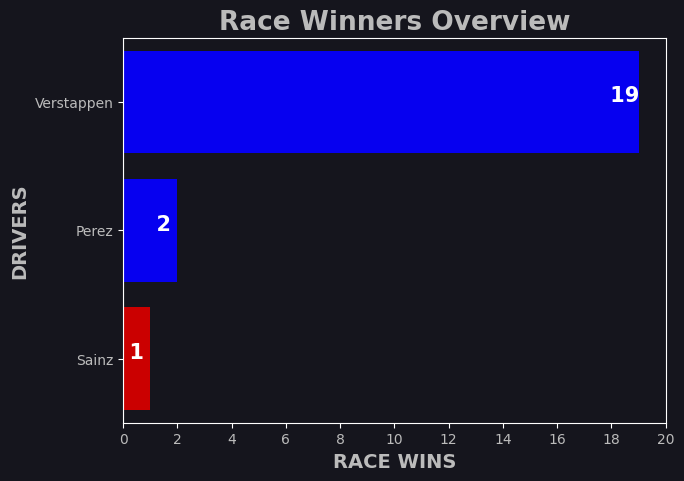

In [15]:
winners = race_results[race_results['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', winners.index)
plt.figure(figsize=(7,5))
plt.axis([0, max(winners) + 0.5, len(winners) - 0.5, -0.5])
plt.barh([driver.split()[1] for driver in winners.index], winners, color=c)
for i in range(len(winners)):
    plt.text(winners[i] - 1.3, i, "{:>3}".format(winners[i]), fontsize=15, fontweight='bold', color='white')
plt.title('Race Winners Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACE WINS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(np.arange(0, max(winners) + 2, 2), color='#bbbbbb')  
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

- Verstappen won 19 races in 2023, the most victories in a single season in Formula 1 history.
- He also broke Alberto Ascari’s record for the highest win percentage in a season, which had stood since 1952. Verstappen finished with an 86.36% win rate, while Ascari had 75%.
- With these two victories, Mexican driver Sergio Perez reached a total of 6 wins in Formula 1.
- Carlos Sainz secured his second victory in the category, both with Ferrari.

### Sprint Race Winners

In [16]:
sprint_results['Position'] = sprint_results['Position'].astype(str)
sprint_winners = sprint_results[sprint_results['Position'] == '1']
sprint_winners_summary = pd.DataFrame({
    'Track': sprint_winners['Track'],
    'Sprint Winner': sprint_winners['Driver'],
    'Team': sprint_winners['Team'],  
})
html_table_sprint_winners = sprint_winners_summary.to_html(index=False)  
display(HTML(html_table_sprint_winners))  

Track,Sprint Winner,Team
Azerbaijan,Sergio Perez,Red Bull Racing Honda RBPT
Austria,Max Verstappen,Red Bull Racing Honda RBPT
Belgium,Max Verstappen,Red Bull Racing Honda RBPT
Qatar,Oscar Piastri,McLaren Mercedes
United States,Max Verstappen,Red Bull Racing Honda RBPT
Brazil,Max Verstappen,Red Bull Racing Honda RBPT


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\833606349.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sprint_winners[i] - 0.4, i, "{:>3}".format(sprint_winners[i]), fontsize=15, fontweight='bold', color='white')


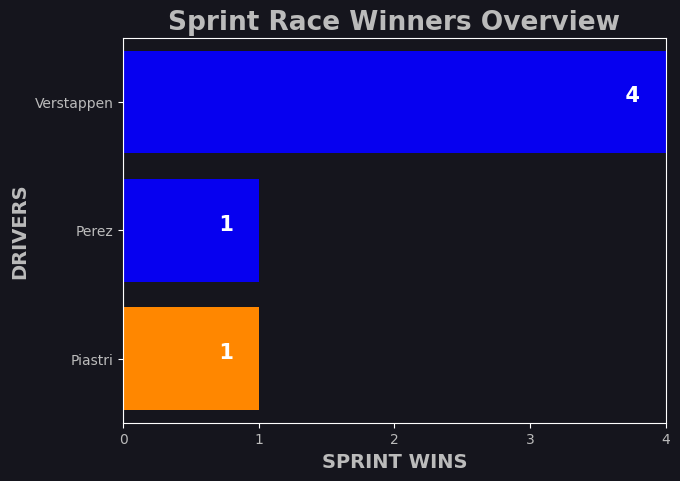

In [17]:
sprint_winners = sprint_results[sprint_results['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', sprint_winners.index)
plt.figure(figsize=(7,5))
plt.axis([0, max(sprint_winners), len(sprint_winners) - 0.5, -0.5])
plt.barh([driver.split()[1] for driver in sprint_winners.index], sprint_winners, color=c)
for i in range(len(sprint_winners)):
    plt.text(sprint_winners[i] - 0.4, i, "{:>3}".format(sprint_winners[i]), fontsize=15, fontweight='bold', color='white')
plt.title('Sprint Race Winners Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('SPRINT WINS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(np.arange(0, max(sprint_winners) + 1, 1), color='#bbbbbb') 
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

- Verstappen dominated the sprint races as well, claiming victory in 4 out of the 6 events.
- Oscar Piastri secured his first-ever Formula 1 win, even though it came in a sprint race.
- The remaining victory was taken by Sergio "Checo" Pérez.

### Pole Positions

In [18]:
race_results['Position'] = race_results['Position'].astype(str)
poles = race_results[race_results['Starting Grid'] == 1]
race_poles_summary = pd.DataFrame({
    'Track': poles['Track'],
    'Pole Position Driver': poles['Driver'],
    'Finish Position': poles['Position'],  
    'Team': poles['Team'],  
})
html_table = race_poles_summary.to_html(index=False)  
display(HTML(html_table))  

Track,Pole Position Driver,Finish Position,Team
Bahrain,Max Verstappen,1,Red Bull Racing Honda RBPT
Saudi Arabia,Sergio Perez,1,Red Bull Racing Honda RBPT
Australia,Max Verstappen,1,Red Bull Racing Honda RBPT
Azerbaijan,Charles Leclerc,3,Ferrari
Miami,Sergio Perez,2,Red Bull Racing Honda RBPT
Monaco,Max Verstappen,1,Red Bull Racing Honda RBPT
Spain,Max Verstappen,1,Red Bull Racing Honda RBPT
Canada,Max Verstappen,1,Red Bull Racing Honda RBPT
Austria,Max Verstappen,1,Red Bull Racing Honda RBPT
Great Britain,Max Verstappen,1,Red Bull Racing Honda RBPT


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\434262539.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pole_counts[i] - 1.1, i, "{:>3}".format(pole_counts[i]),


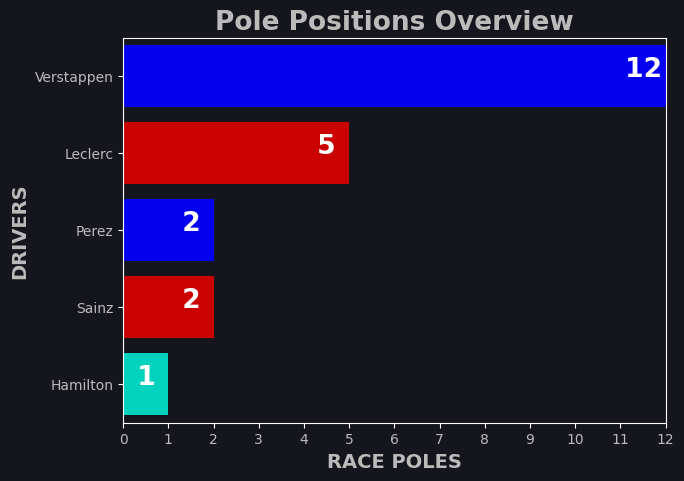

In [19]:
pole_counts = poles['Driver'].value_counts()
c = assign_color('drivers', pole_counts.index)
plt.figure(figsize=(7, 5))
plt.axis([0, max(pole_counts), len(pole_counts) - 0.5, -0.5])
plt.barh([driver.split()[1] for driver in pole_counts.index], pole_counts, color=c)
for i in range(len(pole_counts)):
    plt.text(pole_counts[i] - 1.1, i, "{:>3}".format(pole_counts[i]), 
             fontsize=19, fontweight='bold', color='white')

plt.title('Pole Positions Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACE POLES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(np.arange(0, max(pole_counts) + 1, 1), color='#bbbbbb')  
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

- There was slightly more competition for pole positions this season (though not much), with five different pole sitters.
- Verstappen dominated here as well, achieving 12 poles.
- Charles Leclerc secured five poles, highlighting the Monegasque driver's exceptional speed in qualifying sessions.
- Spanish-speaking drivers, Pérez and Sainz, claimed two poles each.
- Lewis Hamilton reached his 104th career pole position at the Hungarian GP, reinforcing his record as the driver with the most poles in Formula 1 history.

### Finishing Positions of Drivers Starting from Pole

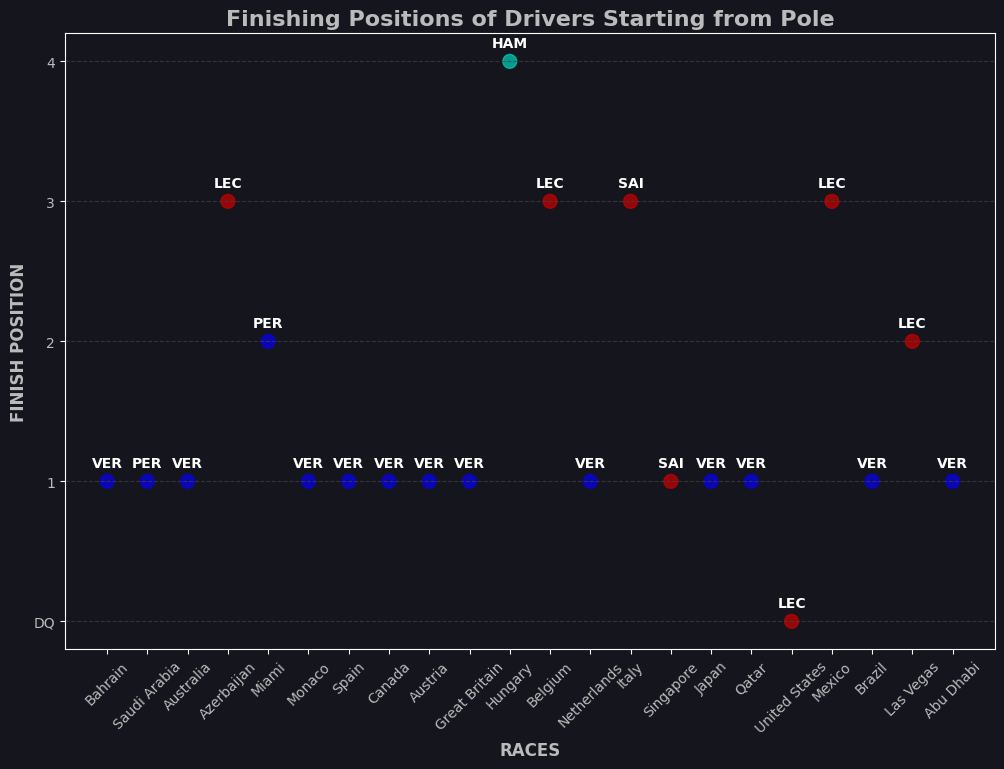

In [20]:
pole_positions = pd.DataFrame({
    'Race': poles['Track'],
    'Driver': poles['Driver'],
    'Finish Position': poles['Position']
})
plt.figure(figsize=(12, 8))

pole_positions['Finish Position'] = pd.Categorical(pole_positions['Finish Position'],
                                                   ordered=True, categories=sorted(pole_positions['Finish Position'].unique(), key=lambda x: (x.isnumeric(), x)))

y_values = pole_positions['Finish Position'].cat.codes
c = assign_color('drivers', pole_positions['Driver'])
scatter = plt.scatter(pole_positions['Race'], y_values, c=c, s=100, alpha=0.7)

for i, row in pole_positions.iterrows():
    abbrev = row['Driver'].split()[1].upper()[:3]  
    plt.text(row['Race'], y_values[i] + 0.1, abbrev,
             fontsize=10, fontweight='bold', ha='center', color='white')  

plt.title('Finishing Positions of Drivers Starting from Pole', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACES', fontsize=12, fontweight='bold', color='#bbbbbb')
plt.ylabel('FINISH POSITION', fontsize=12, fontweight='bold', color='#bbbbbb')
plt.yticks(ticks=range(len(pole_positions['Finish Position'].cat.categories)), 
           labels=pole_positions['Finish Position'].cat.categories, color='#bbbbbb')
plt.xticks(rotation=45, color='#bbbbbb')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Max Verstappen converted all 12 of his poles into victories, setting a new record for the most wins from pole position in a single season. The previous record was held by Nigel Mansell and Sebastian Vettel, both with 9.
- Apart from the Dutchman, only Sergio Pérez and Carlos Sainz managed to convert a pole into a win, doing so at the Saudi Arabian and Singapore Grands Prix, respectively.
- Even though not all drivers who started on pole converted it into a win, most of them still finished on the podium. Only two failed to do so: Hamilton, who finished fourth in Hungary, and Leclerc, who was disqualified at the United States Grand Prix.

### Q2 Participation by Driver

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\4294022114.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(Q2[i]-0.75, i+0.24, "{:>2}".format(Q2[i]), fontsize=12, fontweight='bold', color='k')


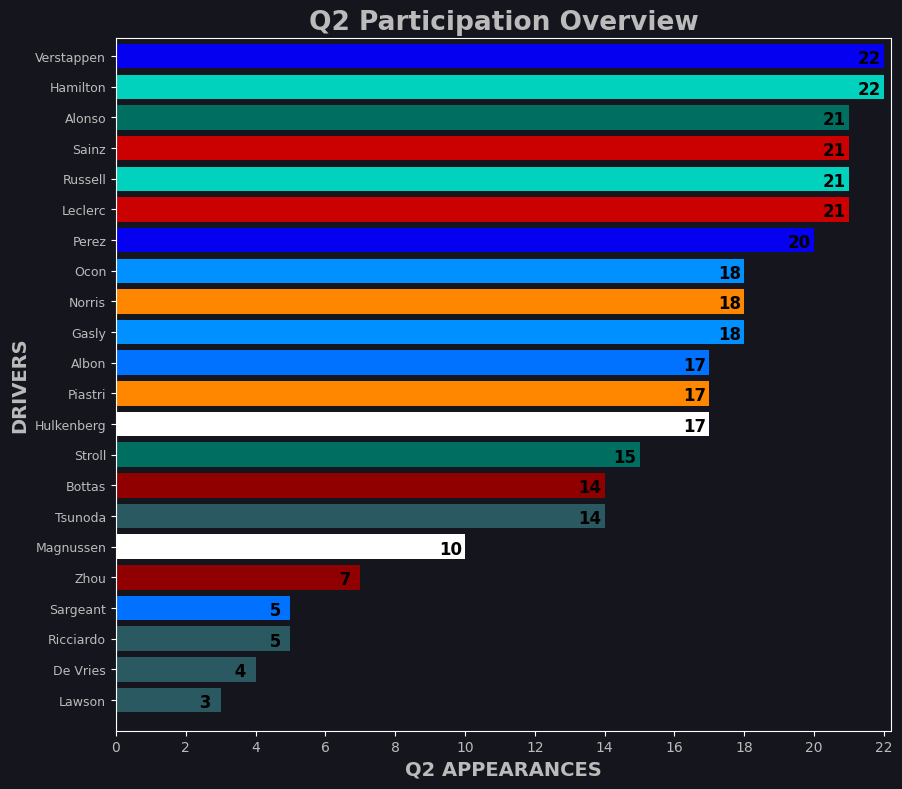

In [21]:
Q2 = qualifying_results[qualifying_results['Position'].isin([str(i) for i in range(1,16)])] \
    ['Driver'].value_counts()
c = assign_color('drivers', Q2.index)
plt.figure(figsize=(10,9))
plt.axis([0,22.2,len(Q2),-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in Q2.index], Q2, color=c)
for i in range(len(Q2)):
    plt.text(Q2[i]-0.75, i+0.24, "{:>2}".format(Q2[i]), fontsize=12, fontweight='bold', color='k')
plt.title("Q2 Participation Overview", fontsize=19, 
          fontweight='bold', color='#bbbbbb')
plt.xlabel('Q2 APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,23,2), range(0,23,2), color='#bbbbbb')
plt.yticks(fontsize=9, color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

- Only two drivers made it to Q2 in all 22 races: Hamilton and Verstappen. They are followed by Alonso, Sainz, Russell, and Leclerc, each with 21 appearances.
- When comparing teammate performances, the biggest difference was seen at Williams. While Albon advanced to Q2 17 times, Sargeant only did so 5 times—an overwhelming gap.
- Other notable differences include Bottas over Zhou and Hulkenberg over Magnussen, both with a 7-qualifying difference.
- Among the drivers who participated in all races, Sargeant had the fewest Q2 appearances, with just 5. Ricciardo, de Vries, and Lawson had fewer, but they didn't complete all 22 races.

### Q3 Participation by Driver

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\2016153563.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(Q3[i]-0.75, i+0.24, "{:>2}".format(Q3[i]), fontsize=12, fontweight='bold', color='k')


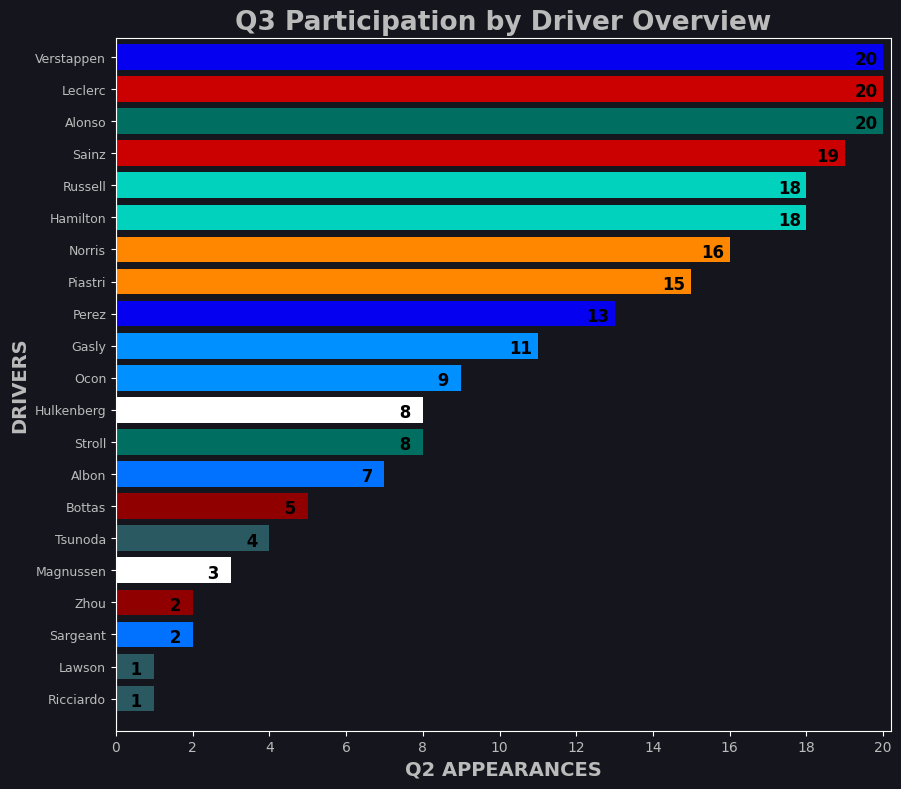

In [22]:
Q3 = qualifying_results[qualifying_results['Position'].isin([str(i) for i in range(1,11)])] \
    ['Driver'].value_counts()
c = assign_color('drivers', Q3.index)
plt.figure(figsize=(10,9))
plt.axis([0,20.2,len(Q3),-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in Q3.index], Q3, color=c)
for i in range(len(Q3)):
    plt.text(Q3[i]-0.75, i+0.24, "{:>2}".format(Q3[i]), fontsize=12, fontweight='bold', color='k')
plt.title("Q3 Participation by Driver Overview", fontsize=19, 
          fontweight='bold', color='#bbbbbb')
plt.xlabel('Q2 APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,21,2), range(0,21,2), color='#bbbbbb')
plt.yticks(fontsize=9, color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

- The drivers who qualified in the top 10 the most times are Verstappen, Leclerc, and Alonso, each with 20 appearances in Q3.
- As seen in the previous graph, Hamilton made it to Q2 in every qualifying session, but here we can see that he reached Q3 18 times, missing out on 4 occasions.
- Comparing the Q2 and Q3 appearances, we see that McLaren had nearly the same number of participations in both, indicating that almost every time they advanced to Q2, they also made it to Q3.
- On the other hand, Alpine, which had advanced to Q2 more times than McLaren, didn’t have as much luck in qualifying for the top 10, as Gasly and Ocon made it to Q3 20 times, while McLaren did so 31 times.
- Lawson and Ricciardo had the fewest Q3 appearances, qualifying just once. However, as mentioned earlier, they didn’t participate in all the races. Of those who were present for every race, Zhou and Sargeant had the fewest Q3 appearances, with only two each.

### Sprint Pole Positions

In [23]:
sprint_results['Position'] = sprint_results['Position'].astype(str)
sprint_poles = sprint_results[sprint_results['Starting Grid'] == 1]
sprint_poles_summary = pd.DataFrame({
    'Track': sprint_poles['Track'],
    'Pole Position Driver': sprint_poles['Driver'],
    'Finish Position': sprint_poles['Position'],  
    'Team': sprint_poles['Team'],  
})

html_table_sprint = sprint_poles_summary.to_html(index=False)  
display(HTML(html_table_sprint))  

Track,Pole Position Driver,Finish Position,Team
Azerbaijan,Charles Leclerc,2,Ferrari
Austria,Max Verstappen,1,Red Bull Racing Honda RBPT
Belgium,Max Verstappen,1,Red Bull Racing Honda RBPT
Qatar,Oscar Piastri,1,McLaren Mercedes
United States,Max Verstappen,1,Red Bull Racing Honda RBPT
Brazil,Lando Norris,2,McLaren Mercedes


- There weren’t many surprises in the sprint races, as 4 out of the 6 pole-sitters managed to convert their poles into victories.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\1514532993.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sprint_pole_counts[i] - 0.4, i, "{:>3}".format(sprint_pole_counts[i]),


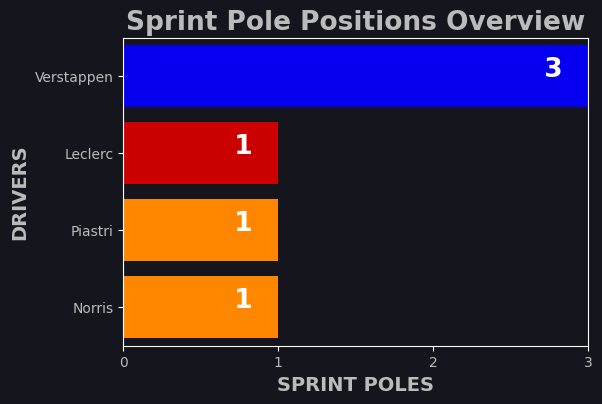

In [24]:
sprint_pole_counts = sprint_poles['Driver'].value_counts()
c = assign_color('drivers', sprint_pole_counts.index)
plt.figure(figsize=(6, 4))
plt.axis([0, max(sprint_pole_counts), len(sprint_pole_counts) - 0.5, -0.5])
plt.barh([driver.split()[1] for driver in sprint_pole_counts.index], sprint_pole_counts, color=c)
for i in range(len(sprint_pole_counts)):
    plt.text(sprint_pole_counts[i] - 0.4, i, "{:>3}".format(sprint_pole_counts[i]), 
             fontsize=19, fontweight='bold', color='white')

plt.title('Sprint Pole Positions Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('SPRINT POLES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(np.arange(0, max(sprint_pole_counts) + 1, 1), color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

- The world champion also led the sprint poles with 3 out of 6.
- McLaren showed improved performance in sprint qualifying sessions, securing two pole positions—one for each driver. This contrasts with their results in the main race qualifying sessions, where they achieved no pole positions.
- Oscar Piastri achieved his first-ever pole position in any format during the 2023 Qatar Grand Prix sprint qualifying, marking a significant milestone in his Formula 1 career.
- The remaining sprint pole was claimed by Ferrari's driver Charles Leclerc.

### Podium Finishes by Driver

In [25]:
race_results['Position_num'] = pd.to_numeric(race_results['Position'], errors='coerce')

drivers_podiums = race_results[race_results['Position_num'].isin([1, 2, 3])]['Driver'].value_counts()

podiums = race_results[race_results['Position_num'].isin([1, 2, 3])]

podium_table = podiums[['Track', 'Driver', 'Position']]

podium_table


,Track,Driver,Position
0,Bahrain,Max Verstappen,1
1,Bahrain,Sergio Perez,2
2,Bahrain,Fernando Alonso,3
20,Saudi Arabia,Sergio Perez,1
21,Saudi Arabia,Max Verstappen,2
...,...,...,...
401,Las Vegas,Charles Leclerc,2
402,Las Vegas,Sergio Perez,3
420,Abu Dhabi,Max Verstappen,1
421,Abu Dhabi,Charles Leclerc,2


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\2019571721.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(drivers_podiums[i] - 1.3, i, "{:>3}".format(drivers_podiums[i]), fontsize=13, fontweight='bold', color='white')


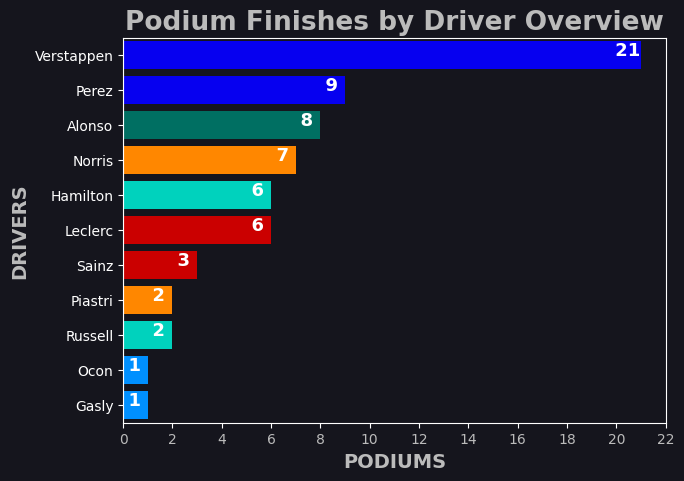

In [26]:
drivers_podiums = race_results[race_results['Position_num'].isin([1, 2, 3])]['Driver'].value_counts()
c = assign_color('drivers', drivers_podiums.index)
plt.figure(figsize=(7,5))
plt.axis([0, max(drivers_podiums), len(drivers_podiums) - 0.5, -0.5])
plt.barh([driver.split()[1] for driver in drivers_podiums.index], drivers_podiums, color=c)
for i in range(len(drivers_podiums)):
    plt.text(drivers_podiums[i] - 1.3, i, "{:>3}".format(drivers_podiums[i]), fontsize=13, fontweight='bold', color='white')
plt.title('Podium Finishes by Driver Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(np.arange(0, max(drivers_podiums) + 2, 2), color='#bbbbbb')  
plt.axvline(0, color='#bbbbbb')
plt.show()

- Verstappen made it to the podium 21 times in 22 races, making him the driver with the most podium finishes in a single season. The previous record, also held by him, was 18.
- Alonso was the driver with the most podiums outside of Red Bull, with an Aston Martin that was highly competitive at the start of the season.
- Lando Norris secured 7 podiums, bringing his total to 13, matching Nick Heidfeld's record for the most podium finishes without a race win.
- Oscar Piastri made it to the podium twice in his debut season.
- Both Alpine drivers earned a podium this season, which is notable considering the team was not on the level of the top teams.
- Nico Hülkenberg extended his record to 203 races without a podium finish.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\1501904108.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(teams_podiums[i] - 0.6, i, "{:>3}".format(teams_podiums[i]),


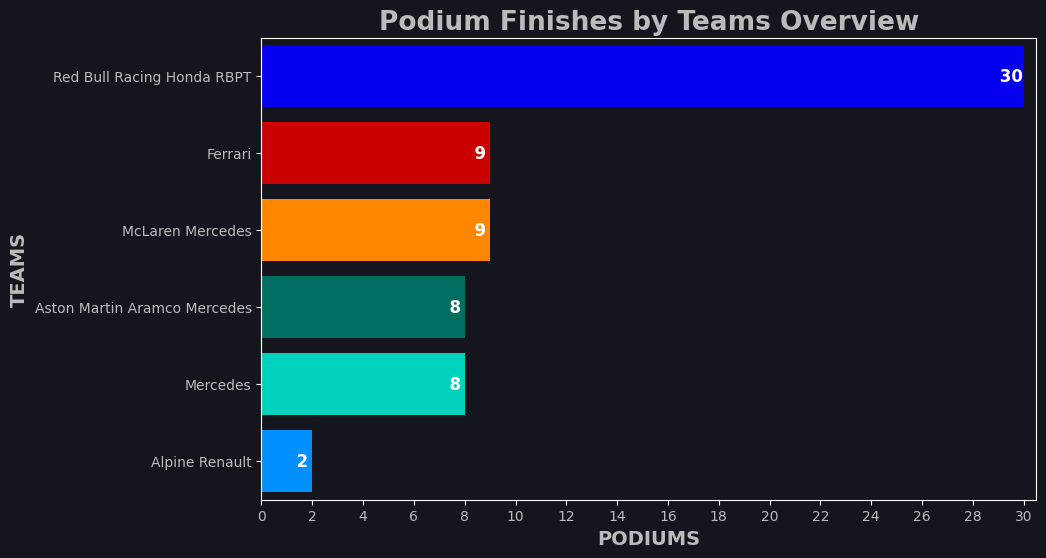

In [27]:
teams_podiums = race_results[race_results['Position_num'].isin([1, 2, 3])].groupby('Team')['Position_num'].count()
teams_podiums = teams_podiums.sort_values(ascending=False) 

c = assign_color('teams', teams_podiums.index)
plt.figure(figsize=(10, 6))  
plt.axis([0, max(teams_podiums) + 0.5, len(teams_podiums) - 0.5, -0.5])
plt.barh(teams_podiums.index, teams_podiums, color=c)
for i in range(len(teams_podiums)):
    plt.text(teams_podiums[i] - 0.6, i, "{:>3}".format(teams_podiums[i]),
             fontsize=12, fontweight='bold', color='white', ha='center', va='center')  

plt.title('Podium Finishes by Teams Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TEAMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(np.arange(0, max(teams_podiums) + 1, 2), color='#bbbbbb')  
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

### Podium Finishes in Sprint Races

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\1061098016.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sprint_podiums[i] - 0.3, i, "{:>3}".format(sprint_podiums[i]),


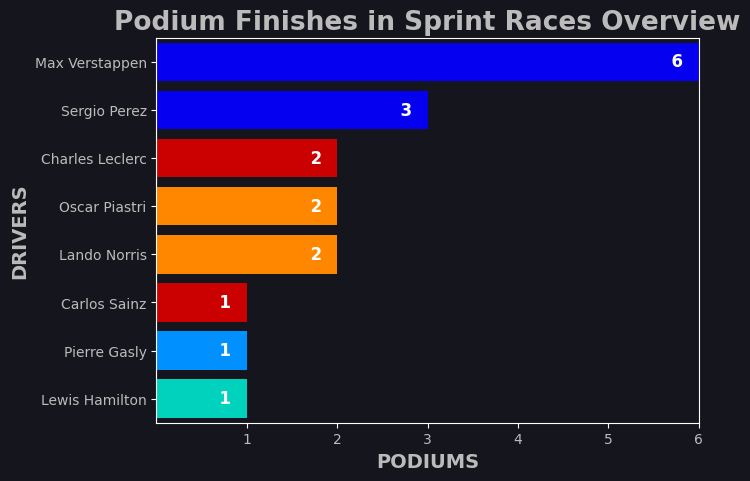

In [28]:
sprint_podiums = sprint_results[sprint_results['Position'].isin(["1", "2", "3"])]['Driver'].value_counts()

c = assign_color('drivers', sprint_podiums.index)

plt.figure(figsize=(7, 5))
plt.axis([0, max(sprint_podiums), len(sprint_podiums) - 0.5, -0.5])

plt.barh(sprint_podiums.index, sprint_podiums, color=c)

for i in range(len(sprint_podiums)):
    plt.text(sprint_podiums[i] - 0.3, i, "{:>3}".format(sprint_podiums[i]),
             fontsize=12, fontweight='bold', color='white', ha='center', va='center') 

plt.title('Podium Finishes in Sprint Races Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')

plt.xticks(np.arange(1, 7, 1), color='#bbbbbb')  
plt.yticks(color='#bbbbbb')

plt.axvline(0, color='#bbbbbb')

plt.show()

- As expected, another chart with Max Verstappen at the top. He was on the podium in all 6 sprint races of the season.
- Sergio Perez is the second driver with the most podiums, with 3.
- The remaining podiums were shared by four different teams, as both Ferrari drivers, both McLaren drivers, Lewis Hamilton for Mercedes, and Pierre Gasly for Alpine all secured podium finishes in the sprint races.

### Top 10 Finishes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\1107345664.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(top10[i]-0.83, i+0.25, "{:>3}".format(top10[i]), fontsize=12, fontweight='bold', color='k')


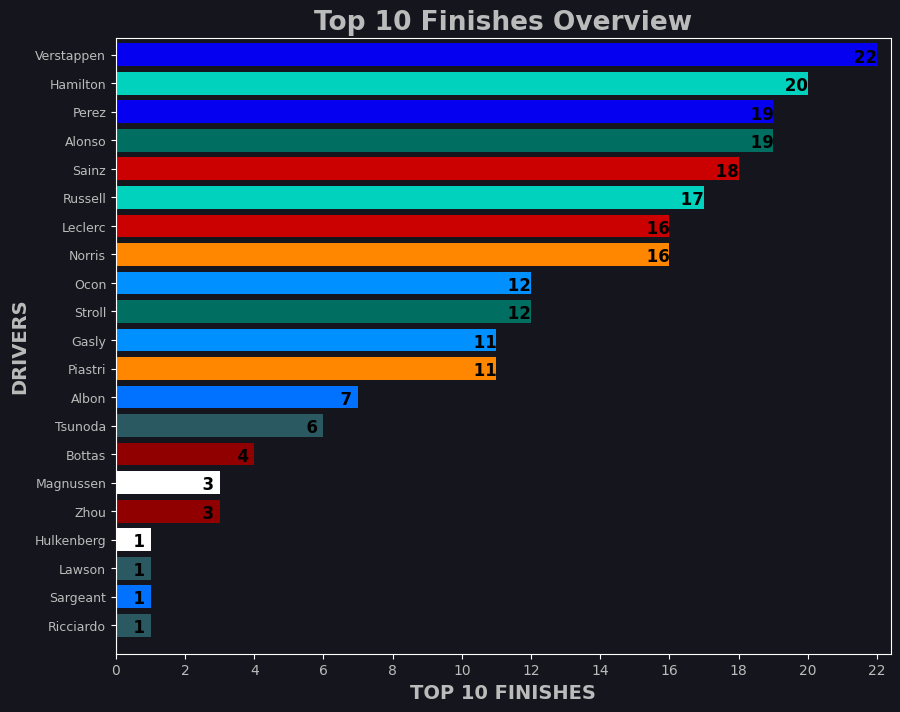

In [29]:
top10 = race_results[race_results['Position'].isin([str(i) for i in range(1,11)])] \
                ['Driver'].value_counts()
c = assign_color('drivers', top10.index)
plt.figure(figsize=(10,8))
plt.axis([0,22.4,len(top10),-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in top10.index], top10, color=c)
for i in range(len(top10)):
    plt.text(top10[i]-0.83, i+0.25, "{:>3}".format(top10[i]), fontsize=12, fontweight='bold', color='k')
plt.title('Top 10 Finishes Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOP 10 FINISHES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,23,2), range(0,23,2), color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()


- World Champion Max Verstappen finished in the points in every race of the season, showcasing not only the performance of his car but also his impressive consistency.
- Hamilton finished in the top 10 on 20 occasions, while Perez and Alonso did so 19 times. Notably, the Spanish driver stood out, finishing in the top 10 seven more times than his teammate Lance Stroll.
- Other drivers who were very consistent include Sainz (18), Russell (17), Leclerc (16), and Norris (16).
- Also worth noting is Alexander Albon, who scored points seven times with Williams, being the team's standout driver and performing at a high level. He significantly outperformed his teammate Logan Sargeant, who only finished in the points once.


### Race Retirements by Driver

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\236136096.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DNFdrivers[i] - 0.17, i + 0.22, DNFdrivers[i], fontsize=12, fontweight='bold', color='k'


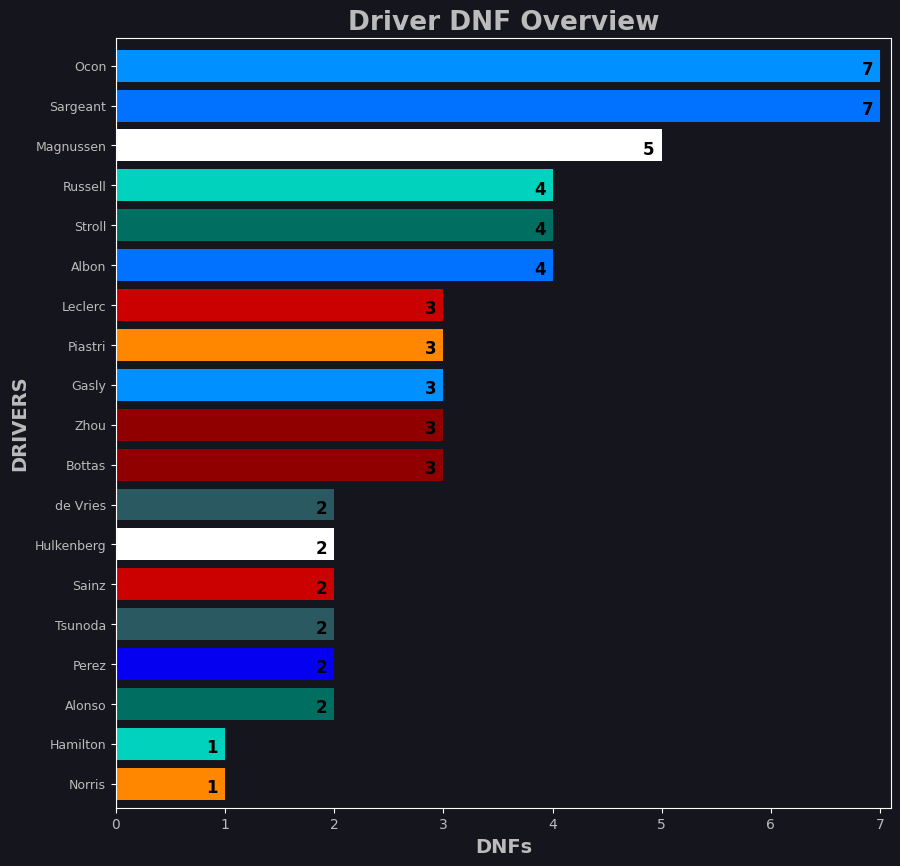

In [30]:
prefix = {"de"}

def process_name(name):
    if "De Vries" in name:
        return "de Vries"
    parts = name.split()
    if len(parts) > 1 and parts[0].lower() in prefix:
        return f"{parts[0]} {parts[1]}"  
    return parts[-1]  


DNFdrivers = race_results[race_results['Time/Retired'] == 'DNF']['Driver'].value_counts()

c = assign_color('drivers', DNFdrivers.index)

plt.figure(figsize=(10, 10))
plt.axis([0, 7.1, len(DNFdrivers) - 0.4, -0.7])  
plt.barh([process_name(driver) for driver in DNFdrivers.index], DNFdrivers, color=c)
for i in range(len(DNFdrivers)):
    plt.text(
        DNFdrivers[i] - 0.17, i + 0.22, DNFdrivers[i], fontsize=12, fontweight='bold', color='k'
    )
plt.title(
    'Driver DNF Overview',
    fontsize=19,
    fontweight='bold',
    color='#bbbbbb',
)
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

- Esteban Ocon and Logan Sargeant are the two drivers with the most retirements, each with 7.
- As we saw in the Top 10 Finishes chart, Max Verstappen finished every race in the points, making him the only driver without any retirements this season (among those who participated in all 22 races).
- Therefore, we can see that Red Bull was the team with the fewest retirements, with only Perez’s two.
- The team with the most DNFs was Williams, which, between Albon with 4 and Sargeant with 7, accumulated a total of 11 retirements.

### DNFs per Race

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\958319010.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(DNFtrack[i]-0.18, i+0.22, DNFtrack[i], fontsize=12, fontweight='bold', color='k')


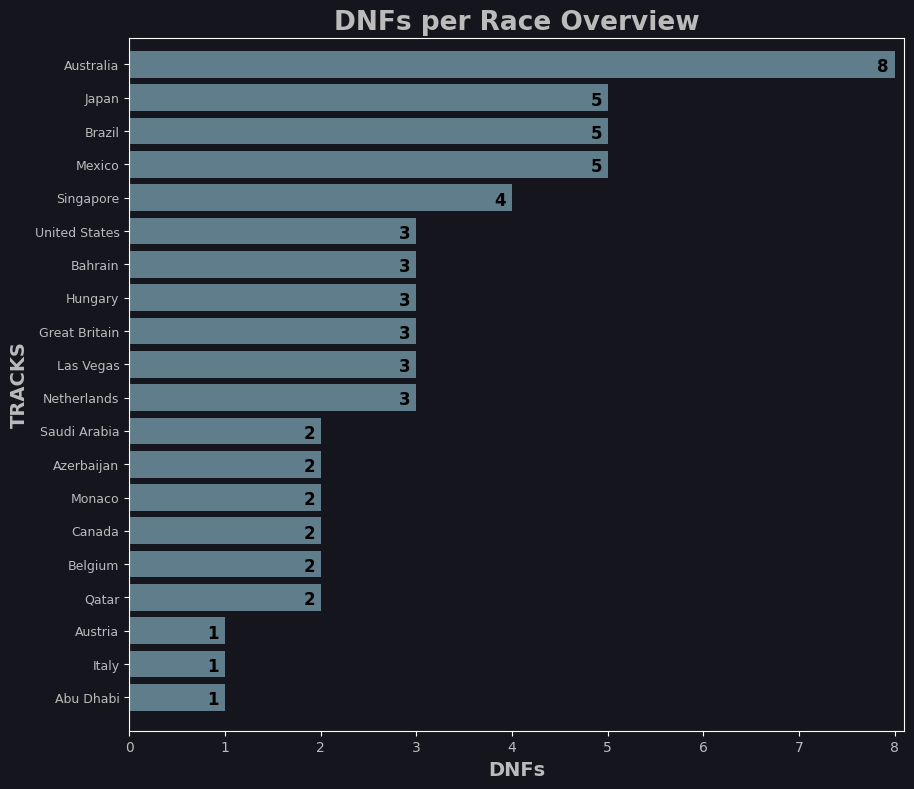

In [31]:
DNFtrack = race_results[race_results['Time/Retired'] == 'DNF']['Track'].value_counts()
plt.figure(figsize=(10,9))
plt.axis([0,8.1,len(DNFtrack),-0.8])
plt.barh(DNFtrack.index, DNFtrack, color='#607d8b')
plt.title('DNFs per Race Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
for i in range(len(DNFtrack)):
    plt.text(DNFtrack[i]-0.18, i+0.22, DNFtrack[i], fontsize=12, fontweight='bold', color='k')
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TRACKS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

- The Grand Prix with the most retirements by far was Australia, with 8 DNFs. The race was chaotic, and it became the first race to have 3 red flags.
- Following that, Japan, Brazil, and Mexico each had 5 retirements.
- Only Spain and Miami were the two Grand Prixs that finished without any retirements.

### Fastest Laps

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\612439786.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(fastestlap[i]-0.22, i+0.15, fastestlap[i], fontsize=17, fontweight='bold', color='k')


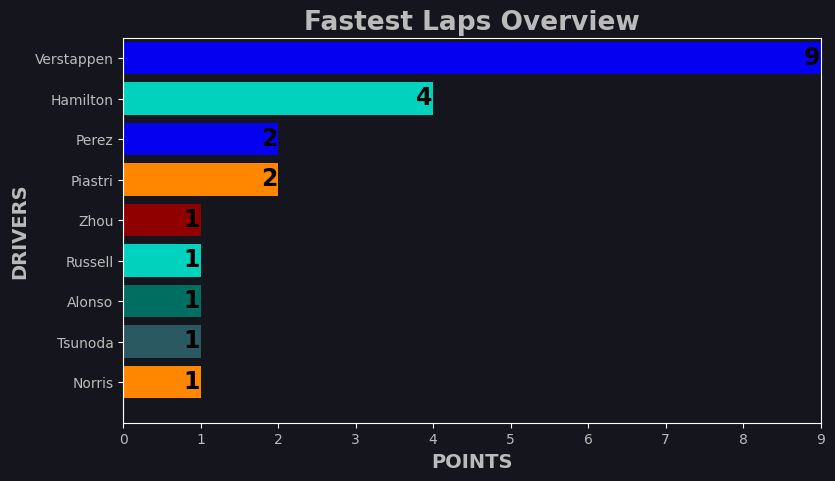

In [32]:
fastestlap = race_results[race_results['Set Fastest Lap'] == 'Yes']['Driver'].value_counts()
c = assign_color('drivers', fastestlap.index)
plt.figure(figsize=(9,5))
plt.axis([0,max(fastestlap),len(fastestlap),-0.5])
plt.barh([driver.split()[1] for driver in fastestlap.index], fastestlap, color=c)
for i in range(len(fastestlap)):
    plt.text(fastestlap[i]-0.22, i+0.15, fastestlap[i], fontsize=17, fontweight='bold', color='k')
plt.title('Fastest Laps Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

- Once again, Verstappen tops the chart. He was the driver with the most fastest laps, with a total of 9.
- Hamilton follows with 4. Perez and Piastri each secured 2.
- Finally, Zhou, Russell, Alonso, Tsunoda, and Norris each achieved 1 fastest lap.

### Driver of the Day

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10820\2440165800.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(dotd[i]-0.18, i+0.2, dotd[i], fontsize=16, fontweight='bold', color='k')


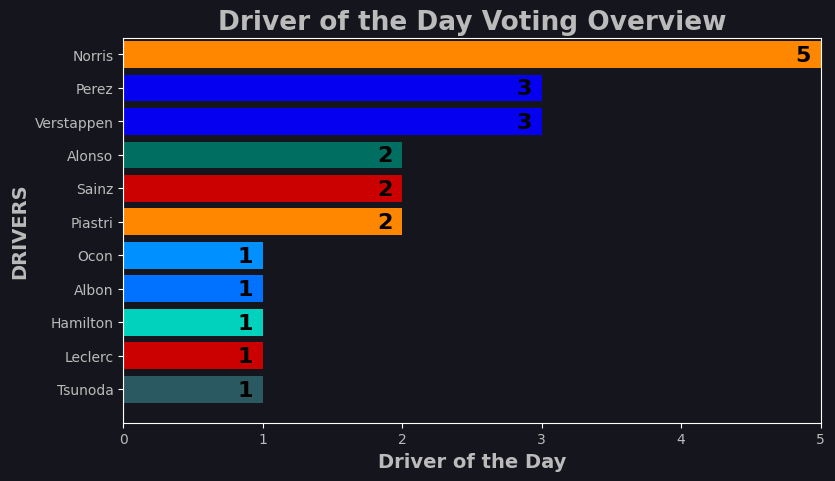

In [33]:
dotd = driver_of_the_day['1st Place'].value_counts()
c = assign_color('drivers', dotd.index)
plt.figure(figsize=(9,5))
plt.axis([0,5, len(dotd),-0.5])
plt.barh([" ".join(driver.split()[1:]) for driver in dotd.index], dotd, color=c)
for i in range(len(dotd)):
    plt.text(dotd[i]-0.18, i+0.2, dotd[i], fontsize=16, fontweight='bold', color='k')
plt.title('Driver of the Day Voting Overview', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('Driver of the Day', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

- Lando Norris was the driver with the most Driver of the Day (DOTD) wins, with a total of 5. He is followed by Red Bull drivers Verstappen and Perez, both with 3.
- A total of 11 drivers managed to be voted Driver of the Day at least once.
- Finally, a chart not led by Verstappen!

## **Conclusions**
- Red Bull dominated the season from start to finish, securing their sixth Constructors' Championship (and their second in a row). They also claimed their seventh Drivers' Championship, thanks to Max Verstappen, who achieved his third consecutive title. Sergio Pérez finished second in the standings, marking the best season of his career. Together, Red Bull’s drivers amassed 30 podiums and 21 race wins—a truly remarkable performance.

- Mercedes secured second place in the championship. Despite not achieving a single victory, Lewis Hamilton delivered a strong performance, finishing third in the standings. He showcased remarkable consistency throughout the season, claiming 6 podiums, 1 pole position, and finishing in the points in 20 out of 22 races. George Russell, on the other hand, lagged behind his teammate, finishing eighth in the championship. Notably, Russell had three more retirements than Hamilton, which undoubtedly impacted his chances of finishing higher. Over the season, he managed to achieve 2 podium finishes.

- The historic Scuderia Ferrari finished third in the Constructors' Championship, battling Mercedes for second place until the very end, ultimately missing out by just three points. They showed significant improvement in the latter part of the season, highlighted by Carlos Sainz's victory at the Singapore Grand Prix—the only race Red Bull did not win all season.
The performance gap between Ferrari’s drivers was minimal, with Charles Leclerc finishing fifth and Carlos Sainz seventh in the Drivers' Championship. The team demonstrated strong one-lap pace, securing 7 pole positions (5 from Leclerc and 2 from Sainz), though perhaps not quite matching the qualifying dominance they showcased in the previous season.

- The British team McLaren was undoubtedly the one that improved the most throughout the season. At the beginning, they struggled significantly, often competing at the back of the field. However, as upgrades started to come in, they climbed up the ranks, ultimately finishing fourth in the Constructors' Championship.
Lando Norris was clearly McLaren's standout driver this season, finishing sixth in the Drivers' Championship and scoring more than double the points of his teammate, Oscar Piastri. Despite being in his rookie season, Piastri managed to finish ninth overall, contributing significantly to the team’s resurgence. Together, they secured 9 podium finishes, and Piastri achieved a remarkable victory in the Qatar Sprint Race.

- Aston Martin had an incredibly strong start to the year, often positioning itself as the second-best team in many races. However, as the season progressed, other teams improved, and Aston Martin seemed to plateau, eventually finishing fifth in the Constructors' Championship.
Fernando Alonso was the clear leader of the team, securing fourth place in the Drivers' Championship. The team achieved eight podium finishes, all thanks to Alonso. Additionally, he demonstrated remarkable consistency by finishing in the top ten on 19 occasions.
In contrast, Lance Stroll finished 10th in the Drivers' Championship, trailing Alonso by 132 points. Unlike his teammate, Stroll didn’t secure any podiums and lacked the same level of consistency.

- Alpine was clearly the sixth-best team this year, finding itself comfortably ahead of the teams below but far from those at the top. It likely wasn’t the season they had hoped for, especially considering they finished fourth in the Constructors' Championship last year.
Nevertheless, they managed to secure two podium finishes (one for each driver) and an additional podium in a sprint race courtesy of Pierre Gasly. There was notable parity between their drivers, with Gasly finishing 11th in the Drivers' Championship and Ocon 12th, separated by only four points.
It’s worth mentioning that Esteban Ocon was among the drivers with the most retirements this season, recording a total of seven DNFs.

- Williams managed to climb out of the last position they held in the previous season, finishing seventh this year. This improvement was largely thanks to Alexander Albon, who had an impressive campaign, ending 13th in the Drivers' Championship and scoring 27 of the team’s 28 points.
Meanwhile, rookie Logan Sargeant secured the remaining point in what turned out to be a somewhat disappointing debut season, further marked by seven retirements.

- AlphaTauri's season was defined by significant changes in their driver lineup. After the first 10 races, they decided to part ways with Nyck de Vries due to disappointing results, replacing him with Daniel Ricciardo, who was previously Red Bull's reserve driver. However, Ricciardo's luck turned when he suffered a wrist injury during practice for the Dutch Grand Prix, which led to him being replaced by New Zealand’s Liam Lawson. Lawson made his Formula 1 debut and raced for five events, scoring 2 points in Singapore.
Ricciardo returned to the seat in Austin after recovering, finishing seventh in Mexico and adding 6 points for the team. Meanwhile, Yuki Tsunoda was the only driver to participate in every race for AlphaTauri, finishing 14th in the championship with 17 points. All drivers combined scored 25 points, and the team ended the season in eighth place in the Constructors' Championship.

- Alfa Romeo had a modest season, finishing in ninth place in the Constructors' Championship, a decline from their sixth-place position last year. Valtteri Bottas was the team's top scorer with 10 points, placing 15th in the Drivers' Championship. Meanwhile, Chinese driver Guanyu Zhou earned 6 points, finishing 18th overall. The team's performance was steady but not remarkable, marking a disappointing step backward for the team.

- The American team powered by Ferrari, Haas, finished 10th in the Constructors' Championship, enduring a tough season. Their drivers only scored points in five races, one of which was a sprint race. Nico Hülkenberg, from Germany, was the team's top scorer with 9 points, finishing 16th in the Drivers' Championship. Meanwhile, Danish driver Kevin Magnussen ended the season in 19th place with 3 points. It was a challenging year for Haas, with limited success on track.

Despite being a season with little excitement in the title battles, 2023 will undoubtedly be remembered in history due to the number of records set by Red Bull, and particularly by Max Verstappen. His dominance throughout the year, coupled with the team's extraordinary performance, makes this season a standout in Formula 1 history. The numerous records, including Verstappen's consecutive wins and Red Bull's unparalleled results, have reshaped the landscape of modern F1 racing.

**And that’s a wrap!**

**Thank you for exploring the 2023 Formula 1 season with me! I hope this project has been informative and enjoyable for those who come across it.**
**Looking ahead, I’m already planning to analyze the 2024 season once it concludes. Stay tuned for more data-driven insights and exciting stories about the upcoming season.**

**See you next time!**
